# Harvest: The Serendipity Machine
___

### Data & Project Overview
___

As I got involved in Data Science, I have the privilege of many a serendipity. Some were small ... helping me overcome a minor issue. Others had massive impact ... a senior Data Scientist agreed to help mentor me my first year in the field! As I get busier, I don't want these serendipities to stop. Enter Harvest. 

Harvest is a recommendor for 1. I personally labelled thousands of tweets for harvest to teach it my preferences. Most recommendor systems are intended to have consumers spend the most time or money on a given site. Harvest instead just tries to understand my preferences & increase the quality serendipities in my life.

Columns:
* tweet - A data science related tweet, tweeted in spring 2021
* Prefer - I personally labeled. If 1, then likely to lead to a serendipity. 0 otherwise.


In [2]:
# Key modules
# Import key packages
import pandas as pd
pd.set_option('display.max_colwidth', -1) #To display entire text content of a column
pd.set_option('display.max_columns', None) # To display all columns
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Import twint API package
import twint

# To handle runtime errors
import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-b04b7e6c3be1>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) #To display entire text content of a column


## 0. Load in Data

In [3]:
# Loading in Data Science related tweets 
c = twint.Config()

# Set conditions
c.Search = 'data science'
c.Search = 'datascience'
c.Pandas = True
c.Since = '2021-05-01'
c.Until = '2021-05-10'

# Search
twint.run.Search(c)

# Store result as df
ds_tweets = twint.storage.panda.Tweets_df

1391179749972578306 2021-05-08 19:54:33 -0400 <rasangarocks> Python One-Liners: Write Concise, Eloquent Python Like a Professional  Link -  https://t.co/SYKvjjMI7T  #Python #100DaysOfCode #CodeNewbies #WomenWhoCode #DEVCommunity #DevOps #Coding #DataScience #MachineLearning #ML #AI
1391179565431771143 2021-05-08 19:53:49 -0400 <AIChatter> KDnuggets™ News 21:n17, May 5: Charticulator: Microsoft Research open-source game-changing Data Visualization platform; Data Science to Predict and Prevent Real World Problems | #AI #ML  https://t.co/f47HLFrtHv
1391179530195243008 2021-05-08 19:53:41 -0400 <mpearce_perth> @AmazonAustralia   I’m all for your data science predicting what I might be interested in next, but this?   Let me know when you start offering small mortgages.  https://t.co/uYvDRvjy6W
1391179490857033730 2021-05-08 19:53:32 -0400 <hassanedesouky> أنا جديد في مجال الData science هل ممكن اقدم في Google summer of code ? ولا لازم اكون ليا علاقة بIOS / Android / … — انا معنديش فكرة اذا 

KeyboardInterrupt: 

In [ ]:
# Let's filter by language
ds_tweets = ds_tweets[ds_tweets['language'] == 'en']

In [ ]:
ds_focus = ds_tweets[['tweet','hashtags','photos']]

In [ ]:
ds_focus_1000 = ds_focus[7000:8000]
ds_focus_2000 = ds_focus[8000:9000]

### 7 rows below left un-run to prevent overwrite.

In [ ]:
# Downloading data to label
ds_focus_1000.to_csv('ds_focus_1000.csv')
ds_focus_2000.to_csv('ds_focus_2000.csv')

In [ ]:
# Re-uploading post labeling
tweets_1k = pd.read_csv('DataScience Pivot/Tweets_1000_labeled.csv', index_col=0)
tweets_2k = pd.read_csv('DataScience Pivot/ds_2k_labeled.csv', index_col=0)

In [ ]:
# Let us combine our dfs 
cb_tweets = pd.concat([tweets_1k,tweets_2k], axis=0)

In [ ]:
# Remove duplicates
cb_tweets['tweet'].duplicated().sum()

In [ ]:
# remove duplicates
cb_tweets = cb_tweets[~cb_tweets['tweet'].duplicated()]
cb_tweets.shape

In [ ]:
# For simplicity, let us only keep the tweet & Prefer columns
tweets_ready = cb_tweets[['tweet','Prefer']]
tweets_ready.head()

In [ ]:
# Let us loud out data
tweets_ready.to_csv('df12.csv')

## 1. Import Data & Target Value Distribution

In [2]:
# Importing data
tweet_data = pd.read_csv('Data/df12.csv', index_col = 0)
tweet_data.reset_index(drop=True, inplace=True)

In [3]:
# Glimpse
tweet_data.head()

tweet  Prefer
0  Expanding the #DataScience Graduate Programme ...       0
1  Hooked on Netflix 🎬🍿? Do you know how recommen...       0
2  12 Steps to Applied AI. #Python #BigData #Anal...       1
3  me learning #DataScience  https://t.co/4n8cKf2xk8       0
4  Check out my #Gig on Fiverr  https://t.co/P8Sk...       0

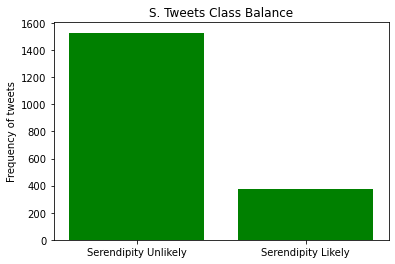

In [5]:
s = [(tweet_data['Prefer'] == 0).sum(),(tweet_data['Prefer'] == 1).sum()]

x_pos = ['Serendipity Unlikely', 'Serendipity Likely']

plt.bar(x_pos, s, color='green')
plt.ylabel("Frequency of tweets")
plt.title("S. Tweets Class Balance")

plt.show()

In [6]:
s[1] / (s[0] + s[1])

0.19568648079957918

In total I felt 19.5% I sampled had serendipity potential.

## 2. Word Clouds of each class

In [7]:
!pip install wordcloud

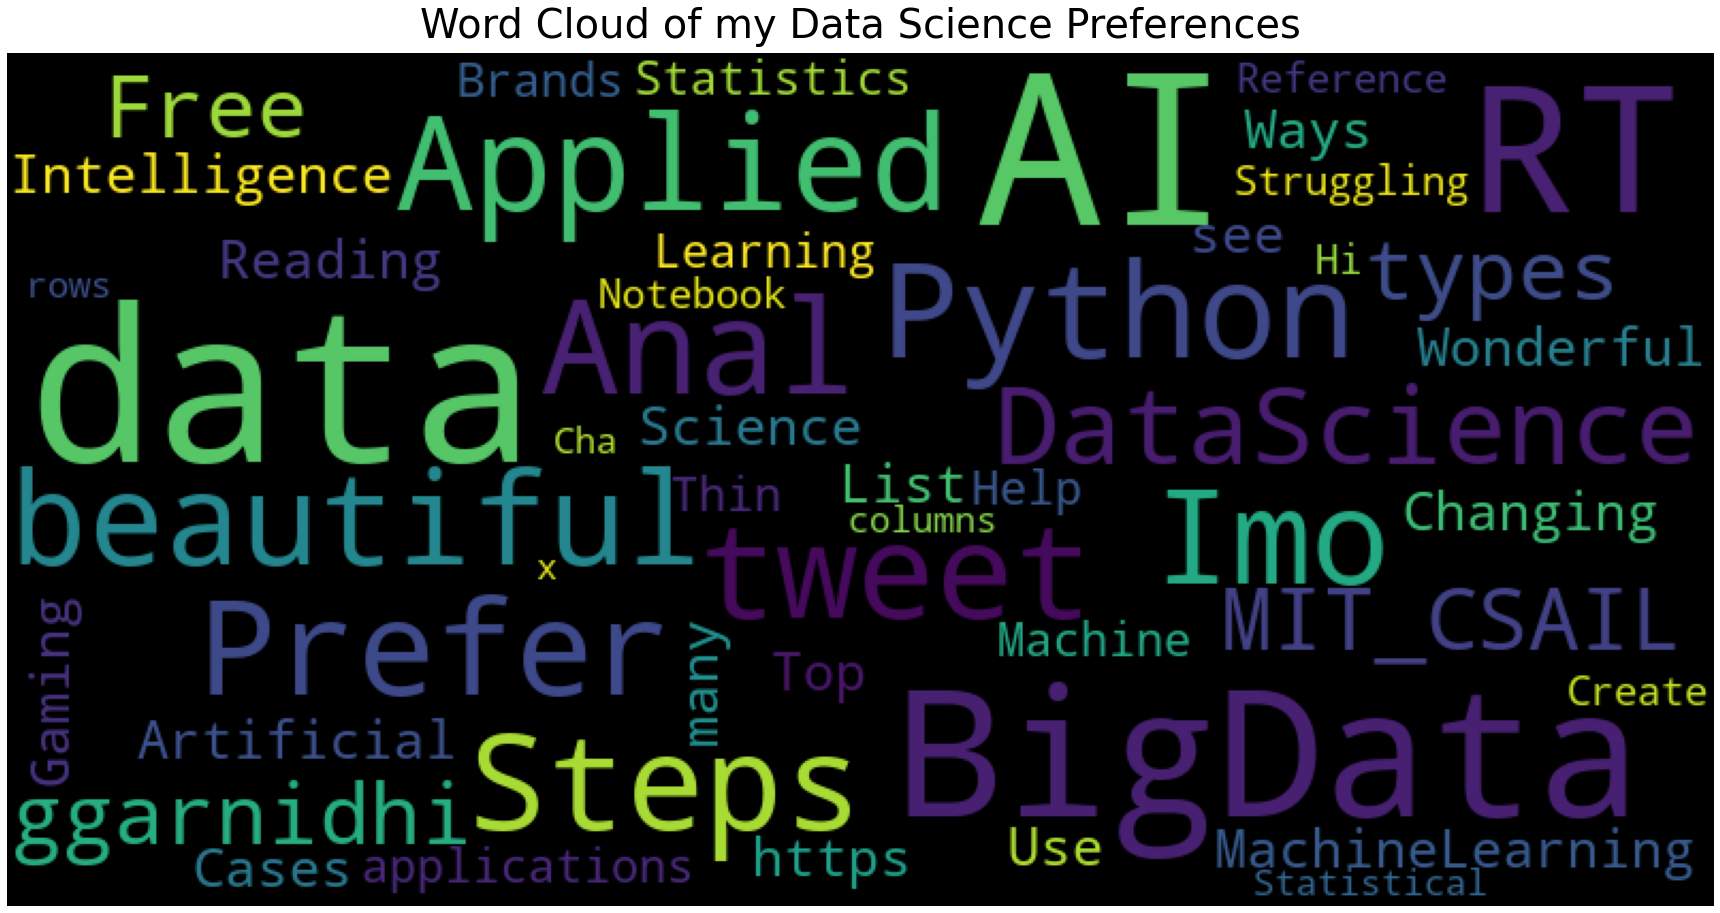

In [11]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(tweet_data[tweet_data["Prefer"]==1], title="Word Cloud of my Data Science Preferences")

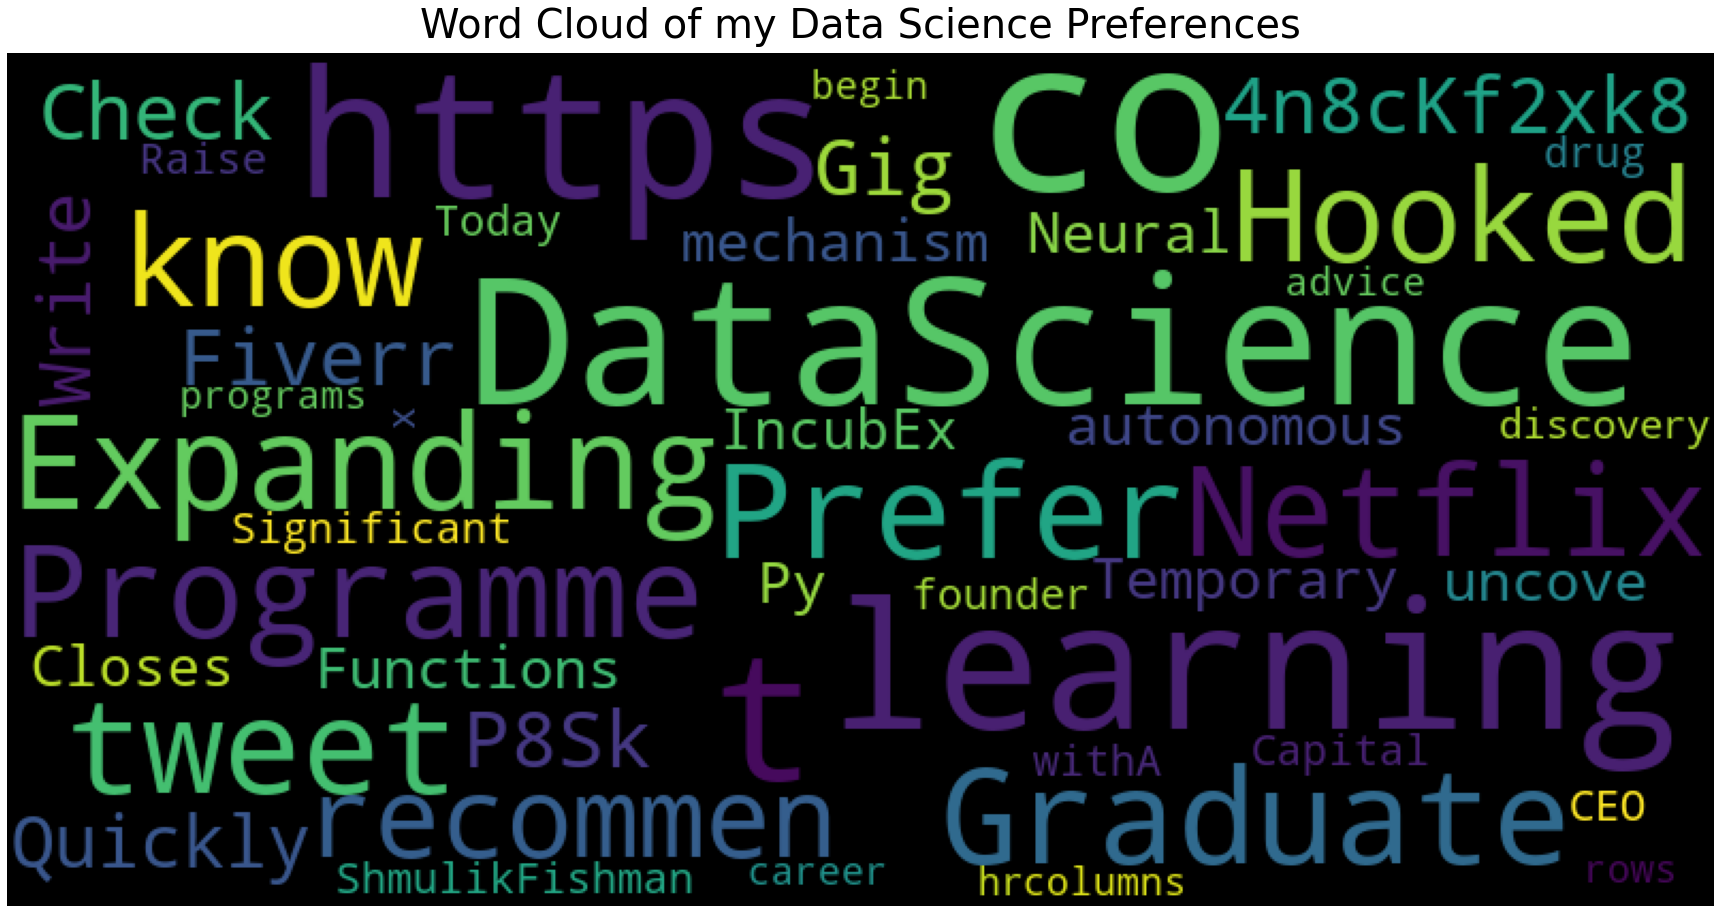

In [12]:
plot_wordcloud(tweet_data[tweet_data["Prefer"]==0], title="Word Cloud of my Data Science Preferences")

Note pattern of 'applied theme': Applied AI, Cases, Applications, beautiful. Makes sense since I've spent time learning theory, now revving to practice more!

## 3. Target Value Distribution

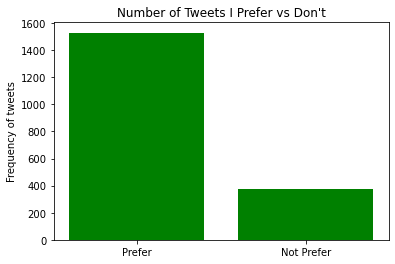

In [19]:
energy = [(tweet_data['Prefer'] == 0).sum(),(tweet_data['Prefer'] == 1).sum()]

x_pos = ['Prefer', 'Not Prefer']

plt.bar(x_pos, energy, color='green')
plt.ylabel("Frequency of tweets")
plt.title("Number of Tweets I Prefer vs Don't")

plt.show()

We will need to correct for class imbalance. But before much else let's try a vanilla model.

## 3. Vanilla Model

In [20]:
from sklearn.model_selection import train_test_split

# Divide into train test
y = tweet_data['Prefer']
X = tweet_data['tweet']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 40,
                                                   stratify = y) 

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(1273, 6964)

In [22]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.8366064414768264
Test score: 0.7977707006369427


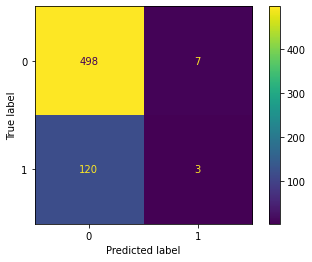

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg0.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       505
           1       0.30      0.02      0.05       123

    accuracy                           0.80       628
   macro avg       0.55      0.51      0.47       628
weighted avg       0.71      0.80      0.72       628



Accuracy score is high, but recall is really low! Of 123 preferred tweets only guessed 3 correctly. (2% recall) Without a substantially higher recall our model is useless.

## 4. Let us correct for class imbalance & retry

In [25]:
X_train = pd.DataFrame(X_train)

## Class imbalance correction
# Let us try via upsampling
from sklearn.utils import resample

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

X_train_bal = pd.DataFrame(X_train_bal)

Number of class 1 examples before: 249
Number of class 1 examples after: 1024


In [26]:
# We vectorize
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train_bal[0])

X_train_transformed = bagofwords.transform(X_train_bal[0]) 
X_test_transformed = bagofwords.transform(X_test) 

In [27]:
# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train_bal)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train_bal)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.9619140625
Test score: 0.7738853503184714


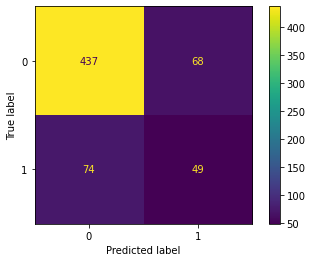

In [28]:
# Get class predictions
y_pred = logreg0.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [29]:
report_upsampled = classification_report(y_test, y_pred)

print(report_upsampled)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       505
           1       0.42      0.40      0.41       123

    accuracy                           0.77       628
   macro avg       0.64      0.63      0.63       628
weighted avg       0.77      0.77      0.77       628



With upsampling, our recall score went from 2% -> 40%! Substantial! Further, our precision score also jumped from 30% to 42%. This is starting to become a usable model now.

## 5. Let us try a custom tokenizer 

In [30]:
import string
import nltk

# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

# Instantiate
stemmer = nltk.stem.PorterStemmer()

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ammarkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train score: 0.955078125
Test score: 0.7659235668789809


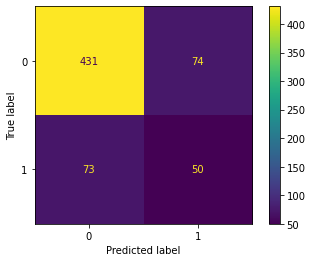

In [31]:
# We vectorize
bagofwords = CountVectorizer(stop_words="english",
                            tokenizer=my_tokenizer)
bagofwords.fit(X_train_bal[0])

X_train_transformed = bagofwords.transform(X_train_bal[0]) 
X_test_transformed = bagofwords.transform(X_test) 

# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train_bal)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train_bal)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")


# Get class predictions
y_pred = logreg0.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [36]:
report_upsampled = classification_report(y_test, y_pred)

print(report_upsampled)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       505
           1       0.35      0.47      0.40       123

    accuracy                           0.72       628
   macro avg       0.60      0.63      0.61       628
weighted avg       0.76      0.72      0.74       628



An increase in recall from 40% to 41%. Precision drops by 2%. However, this is tolerable since if I get recommended a wrong tweet it takes me 2sec to skim through it. But missing a serendipity is expensive.

## 5. We try TD-IDF vectorization

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

Train score: 0.89501953125
Test score: 0.7213375796178344


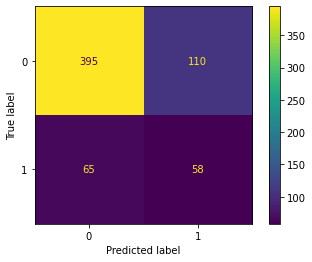

In [34]:
# TF-IDF
tfidf = TfidfVectorizer(stop_words="english",
                            tokenizer=my_tokenizer
                       )
tfidf.fit(X_train_bal[0])

X_train_transformed = tfidf.transform(X_train_bal[0]) 
X_test_transformed = tfidf.transform(X_test) 

# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train_bal)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train_bal)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")


# Get class predictions
y_pred = logreg0.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [35]:
report_upsampled = classification_report(y_test, y_pred)

print(report_upsampled)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       505
           1       0.35      0.47      0.40       123

    accuracy                           0.72       628
   macro avg       0.60      0.63      0.61       628
weighted avg       0.76      0.72      0.74       628



## 6. Let us try different models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# Divide into train test
y = tweet_data['Prefer']
X = tweet_data['tweet']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 40,
                                                   stratify = y) 

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
X_train = pd.DataFrame(X_train)

## Class imbalance correction
# Let us try via upsampling
from sklearn.utils import resample

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

X_train_bal = pd.DataFrame(X_train_bal)

In [13]:
tweet_data.head()

tweet  Prefer
0  Expanding the #DataScience Graduate Programme ...       0
1  Hooked on Netflix 🎬🍿? Do you know how recommen...       0
2  12 Steps to Applied AI. #Python #BigData #Anal...       1
3  me learning #DataScience  https://t.co/4n8cKf2xk8       0
4  Check out my #Gig on Fiverr  https://t.co/P8Sk...       0

In [14]:
from sklearn.model_selection import train_test_split

# Divide into train test
y = tweet_data['Prefer']
X = tweet_data['tweet']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 40,
                                                   stratify = y) 

In [15]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [23]:
X_train.shape

(1273,)

In [24]:
y_train.shape

(1273,)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(1273, 6964)

In [17]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.8366064414768264
Test score: 0.7977707006369427


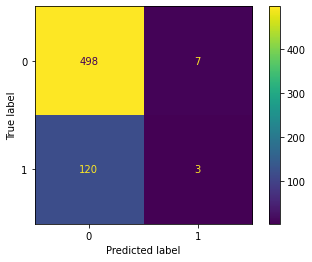

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg0.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

Even though accuracy near 80%, recall extremely low

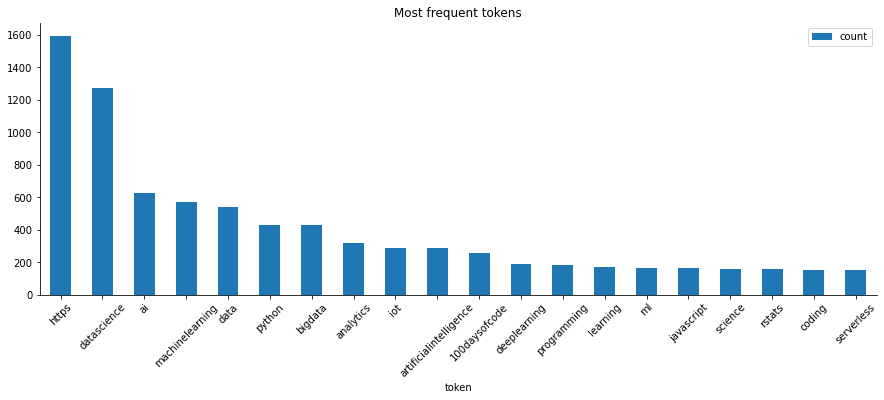

In [31]:
# Most frequently occuring words
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

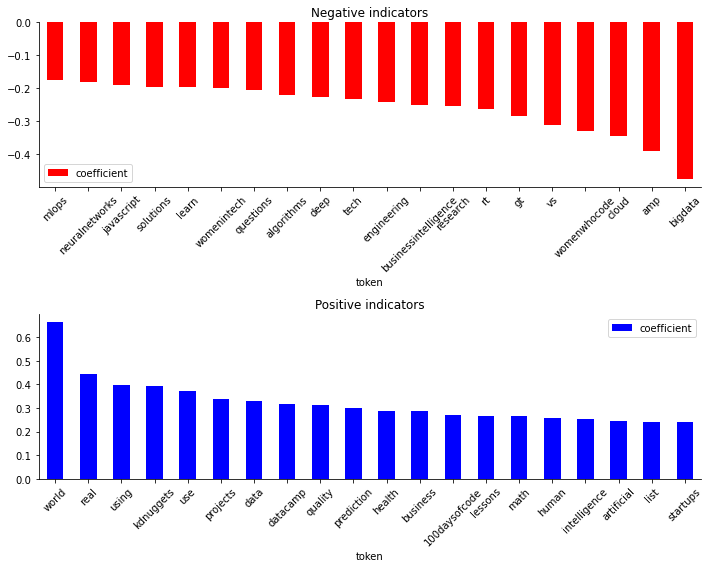

In [32]:
# Coefficients of our model
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg0, words)

Interesting to see that most of my top predictive words relate to application.

## 4. Let's try fitting other models

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [34]:
# Create instances of each model
knn = KNeighborsClassifier(n_neighbors=7)
dt = DecisionTreeClassifier(max_depth=7)
svm = SVC(kernel='rbf', C=0.1)

In [35]:
# Fit & score KNN
knn.fit(X_train_transformed, y_train)

print(knn.score(X_train_transformed, y_train))
print(knn.score(X_test_transformed, y_test))

0.8366064414768264
0.7914012738853503


In [36]:
# Fit & score Decision Tree
dt.fit(X_train_transformed, y_train)

print(dt.score(X_train_transformed, y_train))
print(dt.score(X_test_transformed, y_test))

0.8507462686567164
0.802547770700637


In [37]:
# Fit & score SVM
svm.fit(X_train_transformed, y_train)

print(svm.score(X_train_transformed, y_train))
print(svm.score(X_test_transformed, y_test))

0.8043990573448547
0.804140127388535


SVM best accuracy score with least overfitting so far.

## 5. Removing Infrequent Words

In [38]:
bagofwords = CountVectorizer(stop_words="english", min_df=5)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(1273, 678)

In [39]:
# Fit & score SVM
svm.fit(X_train_transformed, y_train)

print(svm.score(X_train_transformed, y_train))
print(svm.score(X_test_transformed, y_test))

0.8043990573448547
0.804140127388535


In [40]:
X_train_transformed.shape

(1273, 678)

Despite decreasing features from 6964 to 678 (ie by 90%) predictability is still at 80%.

## 6. Let us remove infrequent words

In [42]:
pip install nltk

     |████████████████████████████████| 1.5 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 284 kB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 8.1 MB/s  eta 0:00:01
     |████████████████████████████████| 96 kB 8.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

# Bag of words
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

In [44]:
X_train_transformed.shape

(1273, 707)

In [45]:
# Fit & score SVM
svm.fit(X_train_transformed, y_train)
print(svm.score(X_train_transformed, y_train))
print(svm.score(X_test_transformed, y_test))

0.8043990573448547
0.804140127388535


In [46]:
# Fit & score Decision Tree
dt.fit(X_train_transformed, y_train)

print(dt.score(X_train_transformed, y_train))
print(dt.score(X_test_transformed, y_test))

0.8444619010212098
0.7993630573248408


In [47]:
# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.8201099764336214
Test score: 0.7993630573248408


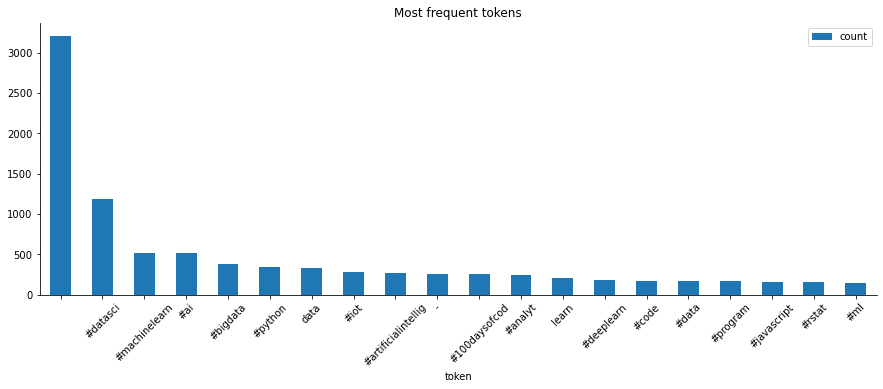

In [48]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

## 6. Let us set up a custom tokenizer

In [49]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [50]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ammarkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(1273, 746)

In [52]:
# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.826394344069128
Test score: 0.7929936305732485


In [53]:
# Fit & score SVM
svm.fit(X_train_transformed, y_train)
print(svm.score(X_train_transformed, y_train))
print(svm.score(X_test_transformed, y_test))

0.8043990573448547
0.804140127388535


We seem to have hit a bottleneck at 80.4%

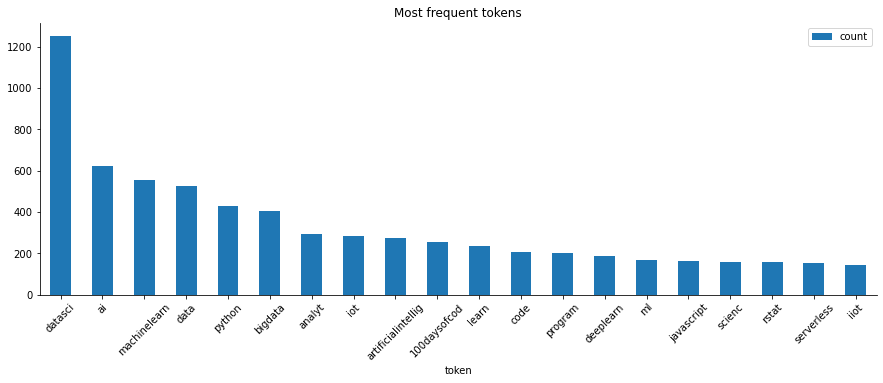

In [54]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

## 7. Let us add N-grams

In [55]:
bagofwords = CountVectorizer(min_df=5,
                             tokenizer=my_tokenizer,
                             ngram_range=(1, 3))
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(1273, 1549)

In [56]:
# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.8342498036135114
Test score: 0.7914012738853503


In [57]:
# Fit & score SVM
svm.fit(X_train_transformed, y_train)
print(svm.score(X_train_transformed, y_train))
print(svm.score(X_test_transformed, y_test))

0.8043990573448547
0.804140127388535


## 8. TF-IDF & Naive Bayes Classifier

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer,
                             ngram_range=(1, 3))
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(1273, 1549)

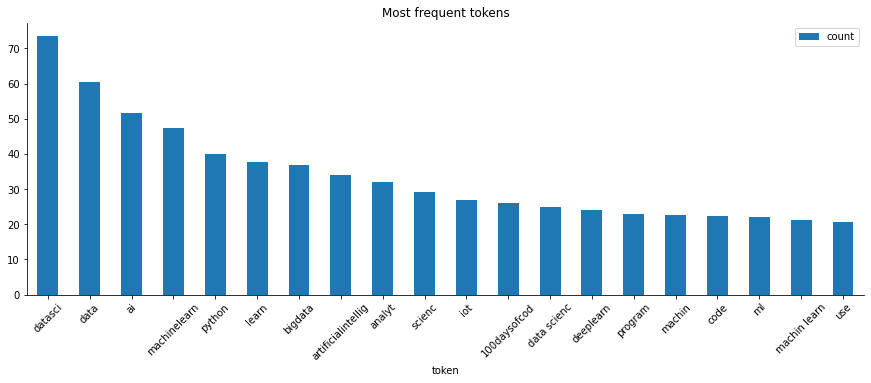

In [60]:
words = tfidf.get_feature_names()
word_weights = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_weights)

In [61]:
# Fitting a model
logreg0 = LogisticRegression(C = 0.1)
logreg0.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg0.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg0.score(X_test_transformed, y_test)}")

Train score: 0.8043990573448547
Test score: 0.804140127388535


In [62]:
# Fit & score SVM
svm.fit(X_train_transformed, y_train)
print(svm.score(X_train_transformed, y_train))
print(svm.score(X_test_transformed, y_test))

0.8043990573448547
0.804140127388535


In [64]:
from sklearn.naive_bayes import BernoulliNB

# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
nbmodel.fit(X_train_transformed,y_train)
print("Train score",nbmodel.score(X_train_transformed,y_train))
print("Test score",nbmodel.score(X_test_transformed,y_test))

Train score 0.8546739984289081
Test score 0.7484076433121019


It seem I've hit the ceiling as far as linear techniques go.

## 9. Non-Linear Models

In [69]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

#fitting Boosting
grad_boost_model = GradientBoostingClassifier(verbose=1)
grad_boost_model.fit(X_train_transformed, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9696            1.17s
         2           0.9549            1.13s
         3           0.9422            1.06s
         4           0.9297            1.01s
         5           0.9203            0.97s
         6           0.9115            0.91s
         7           0.9035            0.89s
         8           0.8933            0.88s
         9           0.8873            0.86s
        10           0.8820            0.83s
        20           0.8329            0.61s
        30           0.7943            0.49s
        40           0.7594            0.40s
        50           0.7309            0.33s
        60           0.7037            0.26s
        70           0.6778            0.19s
        80           0.6552            0.12s
        90           0.6362            0.06s
       100           0.6177            0.00s


GradientBoostingClassifier(verbose=1)

In [71]:
print(f"Gradient Boost train score: {grad_boost_model.score(X_train_transformed,y_train)}")
print(f"Gradient Boost test score: {grad_boost_model.score(X_test_transformed,y_test)}")

Gradient Boost train score: 0.8711704634721131
Gradient Boost test score: 0.7929936305732485


Clearly overfitting with 87% train.

In [123]:
# xgboost
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(X_train_transformed, y_train)

print(f"XG Boost train score: {XGB_model.score(X_train_transformed, y_train)}")
print(f"XG Boost test score: {XGB_model.score(X_test_transformed, y_test)}")

XG Boost train score: 0.9787902592301649
XG Boost test score: 0.785031847133758


Extreme overfitting at 98% train score!

In [102]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X_train_transformed, y_train)

print(f"Random forest train score: {my_random_forest.score(X_train_transformed, y_train)}")
print(f"Random forest test score: {my_random_forest.score(X_test_transformed, y_test)}")

Random forest train score: 0.992930086410055
Random forest test score: 0.7898089171974523


## 10. Let us do a gridsearch to optimize

In [ ]:
# With complex models (Random forest, Gradient boosting)


In [93]:
#Step 1 : Set up the Pipeline with the steps we want
from sklearn.pipeline import Pipeline

estimators = [('model', LogisticRegression())]


In [111]:
#Step 1 : Set up the Pipeline with the steps we want
from sklearn.pipeline import Pipeline

estimators = [('model', LogisticRegression())]

pipe = Pipeline(estimators)

# Grid searching logistic regression, svm, naive bayes, decision trees.
from sklearn.model_selection import GridSearchCV

param_grid = [{'model': [LogisticRegression(solver='liblinear')],
              'model__penalty': ['l1','l2'],
              'model__C': list(np.logspace(-5,5,11))},
              
              {'model': [DecisionTreeClassifier()],
              'model__max_depth': list(range(1,int(np.sqrt(X_train.shape[0])))),
              'model__min_samples_leaf': [1,2,3,4,5,6]
              },
              
             {'model': [SVC(kernel='rbf')],
              'model__C': list(np.logspace(-5,5,11))
              },
              
              {'model': [BernoulliNB()]
              }
             ]

# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
nbmodel.fit(X_train_transformed,y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='recall')

fitted_grid = grid.fit(X_train_transformed,y_train)

In [114]:
fitted_grid.best_params_

{'model': LogisticRegression(C=100000.0, penalty='l1', solver='liblinear'),
 'model__C': 100000.0,
 'model__penalty': 'l1'}

In [122]:
from sklearn.metrics import recall_score

# Get class predictions
y_pred = fitted_grid.predict(X_test_transformed)

recall_score(y_test, y_pred)

0.3089430894308943

30.1 % recall score. Up from 19.5% by random guessing.

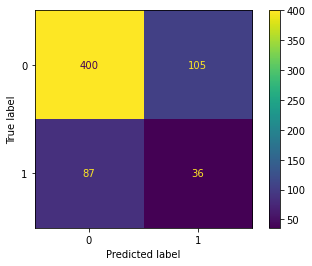

In [119]:
# Get class predictions
y_pred = logreg0.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [ ]:
# Get class predictions
y_pred = fitted_grid.predict(X_test_transformed)

recall_score(y_test, y_pred)

In [127]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,100,10):
    my_random_forest = RandomForestClassifier(n_estimators=i)
    my_random_forest.fit(X_train_transformed, y_train)
    print(f"For {i} estinators")
    
    y_pred_test = my_random_forest.predict(X_test_transformed)
    print(f"Random forest test recall score: {recall_score(y_test, y_pred)}")

For 1 estinators
Random forest test recall score: 0.17073170731707318
For 11 estinators
Random forest test recall score: 0.12195121951219512
For 21 estinators
Random forest test recall score: 0.056910569105691054
For 31 estinators
Random forest test recall score: 0.06504065040650407
For 41 estinators
Random forest test recall score: 0.056910569105691054
For 51 estinators
Random forest test recall score: 0.07317073170731707
For 61 estinators
Random forest test recall score: 0.056910569105691054
For 71 estinators
Random forest test recall score: 0.07317073170731707
For 81 estinators
Random forest test recall score: 0.07317073170731707
For 91 estinators
Random forest test recall score: 0.08130081300813008


## 11. Correcting for class imbalance

In [128]:
X_train[y_train == 1].shape[0]

249

In [129]:
# Let us try via upsampling
from sklearn.utils import resample

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))


Number of class 1 examples before: 249
Number of class 1 examples after: 1024


In [133]:
## Let us re-check recall after upsampling

# Vectorize
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=my_tokenizer,
                             ngram_range=(1, 3))
tfidf.fit(X_train_bal)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

# Grid search

# Check accuracy

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

... grid searching little bit more, then let's move on to setting up new learning, UI & new slides. Forget stuff below for now. If time left, better spent getting data from new data source like Slack.

## 5. Feature Engineering

In [ ]:
train_full = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_train_transformed.toarray())
test_full = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_test_transformed.toarray())

In [ ]:
train_full.head()

In [ ]:
## Num of words in tweet ##
train_full["num_words"] = X_train.apply(lambda x: len(str(x).split()))
test_full["num_words"] = X_test.apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_full["num_unique_words"] = X_train.apply(lambda x: len(set(str(x).split())))
test_full["num_unique_words"] = X_test.apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_full["num_chars"] = X_train.apply(lambda x: len(str(x)))
test_full["num_chars"] = X_test.apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_full["num_stopwords"] = X_train.apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test_full["num_stopwords"] = X_test.apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
train_full["num_punctuations"] = X_train.apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test_full["num_punctuations"] = X_test.apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of Upper case words in the text ##
train_full["num_words_upper"] = X_train.apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test_full["num_words_upper"] = X_test.apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Average length of the words in the text ##
train_full["mean_word_len"] = X_train.apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_full["mean_word_len"] = X_test.apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#### Let us remove NAs

In [ ]:
train_full.isna().sum()

In [ ]:
train_full.isna().sum().sum()

In [ ]:
train_full['mean_word_len'].isna().sum()

In [ ]:
train_boolean_mask = (~train_full['mean_word_len'].isna())
train_full = train_full[train_boolean_mask]
train_full.isna().sum().sum() # Train clean!

In [ ]:
test_full.isna().sum()

In [ ]:
test_full.isna().sum().sum()

In [ ]:
test_full['mean_word_len'].isna().sum()

In [ ]:
test_boolean_mask = (~test_full['mean_word_len'].isna())
test_full = test_full[test_boolean_mask]
test_full.isna().sum().sum() # Test clean!

In [ ]:
# Let us remove similar NAs from target variable
y_train = y_train[train_boolean_mask]
y_test = y_test[test_boolean_mask]

In [ ]:
logreg1 = LogisticRegression(C = 0.1)
logreg1.fit(train_full, y_train)

# Training and test score
print(f"Train score: {logreg1.score(train_full, y_train)}")
print(f"Test score: {logreg1.score(test_full, y_test)}")

In [ ]:
# Confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg1.predict(test_full)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

Very limited improvement.

## 6. Complex Feature Engineering

## 7. Feature Reduction

In [ ]:
"""from sklearn import feature_selection 
y = data_clean['target']
X_names = tfidf.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()
len(X_names)"""

## 8. Naive Bayes Classifier

## 9. Xgboost

## 10. LSTM

... readme & Git upload.

... prep that presentation.